<a href="https://highway.esa.int/">
    <span style=float:left>
        <img src='./img/highway_logo.svg' alt='HIGHWAY' align='center' width='150px'></img>
    </span>
</a>
<a href="https://www.esa.int/">
    <span style=float:right>
        <img src='./img/ESA_logo_2020_White.png' alt='HIGHWAY' align='center' width='250px'></img>
    </span>
</a>

# HIGHWAY Data catalogue


This notebook introduce the HIGHWAY data catalogue.

## Initialisation and connection to the HIGHWAY SERVICE.

In [1]:
import requests
from lib.HIGHWAY_auth import connection_desp
import getpass
import xarray as xr
import colormaps as cmaps
import json

URL_STAC = 'https://ds.highway.esa.int/da/stac'
URL_DATA_SERVICES = 'https://ds.highway.esa.int/'

DATASET_ID = 'L3SW_Open'

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
username = getpass.getpass('Type your username : ')
password = getpass.getpass('Type your password : ')

access_token = connection_desp(username, password)


## Request on collections
First we request the full list of native dataset available on HIGHWAY with the STAC API.

In [3]:

payload = {}
headers = {}

response = requests.request("GET", URL_STAC + '/collections', headers=headers, data=payload)

print(json.dumps(response.json(),  indent=4))


{
    "collections": [
        {
            "id": "L3_DEBIAS_LOCEAN",
            "type": "Collection",
            "title": "L3_DEBIAS_LOCEAN",
            "extent": {
                "spatial": {
                    "bbox": [
                        [
                            -180,
                            -90,
                            180,
                            90
                        ]
                    ]
                },
                "temporal": {
                    "interval": [
                        [
                            "2010-01-12T00:00:00Z",
                            null
                        ]
                    ]
                }
            },
            "license": "various",
            "keywords": [
                "SMOS"
            ],
            "providers": [
                {
                    "url": "https://www.esa.int",
                    "name": "ESA/ESRIN",
                    "roles": [
                        "p

To get the list of items of a dataset, the request need the access_token generated previously.

In [4]:
payload = {}
headers = {
    'Authorization': 'Bearer ' + access_token,
}

response = requests.get(URL_STAC + '/collections/' + DATASET_ID + '/items', headers=headers, data=payload)

items = response.json()['features']
print(json.dumps(items, indent=4))

[
    {
        "id": "SM_OPER_MIR_SCA3SW_20250401_306_001_7.nc",
        "bbox": [
            "-180.0000",
            "-90.0000",
            "180.0000",
            "90.0000"
        ],
        "type": "Feature",
        "assets": {
            "file": {
                "href": "/da/download/SMOS/MIR_SCA3SW/306/SM_OPER_MIR_SCA3SW_20250401_306_001_7.nc",
                "type": "application/netcdf",
                "roles": [
                    "data"
                ],
                "title": "Native File",
                "description": "Native File",
                "auth:refs": [
                    "oidc"
                ]
            }
        },
        "geometry": {
            "type": "Polygon",
            "coordinates": [
                [
                    [
                        -180,
                        -90
                    ],
                    [
                        -180,
                        90
                    ],
                    [
       

Select an ITEM to check

In [5]:
select = input('which of the displayed 10 products do you want to download? (type one number in the range 1-' + str(
    len(items)) + ') : ')
#--------------setting the parameters for the download request----------------

stac_item = items[int(select) - 1]

print(json.dumps(stac_item, indent=4))


{
    "id": "SM_OPER_MIR_SCA3SW_20250329_306_002_7.nc",
    "bbox": [
        "-180.0000",
        "-90.0000",
        "180.0000",
        "90.0000"
    ],
    "type": "Feature",
    "assets": {
        "file": {
            "href": "/da/download/SMOS/MIR_SCA3SW/306/SM_OPER_MIR_SCA3SW_20250329_306_002_7.nc",
            "type": "application/netcdf",
            "roles": [
                "data"
            ],
            "title": "Native File",
            "description": "Native File",
            "auth:refs": [
                "oidc"
            ]
        }
    },
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [
                    -180,
                    -90
                ],
                [
                    -180,
                    90
                ],
                [
                    180,
                    90
                ],
                [
                    180,
                    -90
                ],


request the STAC detail for this item

In [6]:
for link in stac_item['links']:
    if link['rel'] == 'self':
        detail_link = link

payload = {}
headers = {
    'Authorization': 'Bearer ' + access_token
}

stac_item_detail = requests.request("GET", detail_link['href'], headers=headers, data=payload).json()

print(json.dumps(stac_item_detail, indent=4))


{
    "id": "SM_OPER_MIR_SCA3SW_20250329_306_002_7.nc",
    "bbox": [
        "-180.0000",
        "-90.0000",
        "180.0000",
        "90.0000"
    ],
    "type": "Feature",
    "assets": {
        "file": {
            "href": "/da/download/SMOS/MIR_SCA3SW/306/SM_OPER_MIR_SCA3SW_20250329_306_002_7.nc",
            "type": "application/netcdf",
            "roles": [
                "data"
            ],
            "title": "Native File",
            "description": "Native File",
            "auth:refs": [
                "oidc"
            ]
        }
    },
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [
                    -180,
                    -90
                ],
                [
                    -180,
                    90
                ],
                [
                    180,
                    90
                ],
                [
                    180,
                    -90
                ],


Now we download the item

In [7]:
payload = {}
headers = {
    'Authorization': 'Bearer ' + access_token
}

response = requests.request("GET", URL_DATA_SERVICES + stac_item_detail['assets']['file']['href'], headers=headers,
                            data=payload)
file_name = stac_item_detail['id']
with open(file_name, 'wb') as f:
    f.write(response.content)


## A visualisation of the product

In [8]:
ds = xr.open_dataset(file_name, decode_coords="all", decode_times=False)

df = ds.to_dataframe()

variables = ds['wind_speed']

variables['latitude'] = variables['lat']
variables['longitude'] = variables['lon']
variables


<xarray.DataArray 'wind_speed' (time: 1, lat: 721, lon: 1440)> Size: 4MB
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], shape=(1, 721, 1440), dtype=float32)
Coordinates:
  * time       (time) float32 4B 1.287e+04
  * lat        (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon        (lon) float32 6kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    latitude   (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
    longitude  (lon) float32 6kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes:
    long_name:              retrieved wind speed
    standard_name:          wind_speed
    authority:              CF-1.7
    units:                  m s-1
    coverage_content_type:  physicalMeasurement

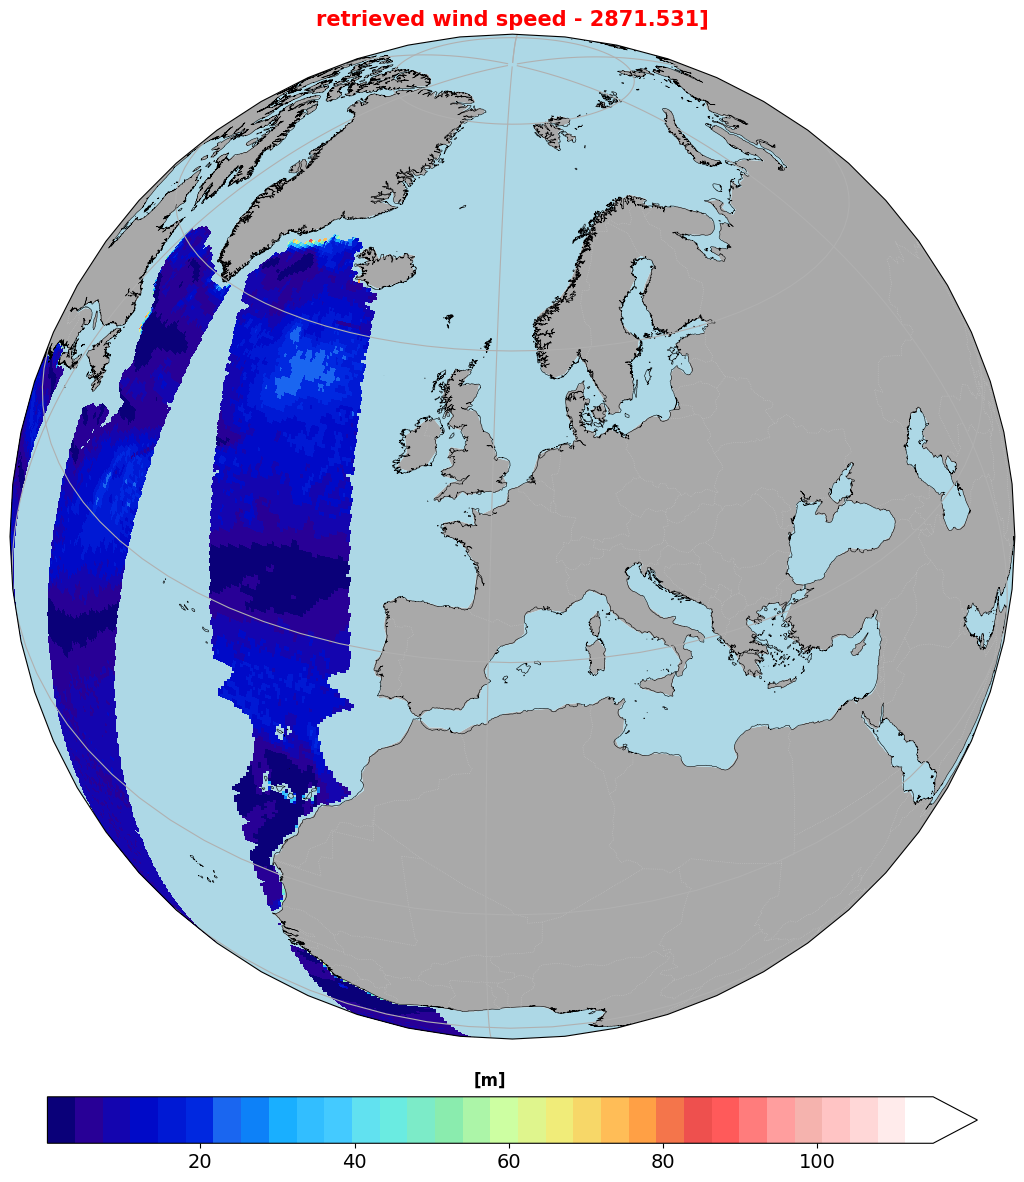

In [9]:
#-----------------data visualization-------------------

values = variables[0, :, :]  # values to plot
latitude = variables.latitude  # matrix of latitude values
longitude = variables.longitude  # matrix of longitude values
date = str(variables['time'].values)[2:12]  # date of acquisition

title = variables.attrs['long_name']  # name of the variable
cmap = cmaps.GMT_haxby

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(
    projection=ccrs.NearsidePerspective(
        central_longitude=2,
        central_latitude=48,
        satellite_height=5500000,
        false_easting=0,
        false_northing=0))
ax.set_global()
img = ax.pcolormesh(longitude, latitude, values, shading='auto', cmap=cmap, transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m', linewidth=0.4, edgecolor='white')
ax.add_feature(cfeature.LAND, facecolor='darkgray')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='silver')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.gridlines()
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.08, pad=0.05, shrink=0.8, extend='max')
cbar.ax.set_title('[m]', fontsize=12, fontweight='bold', pad=8)
cbar.ax.tick_params(labelsize=14)
plt.title(title + " - " + date, fontweight='bold', color='red', fontsize=15)
plt.savefig(file_name.split('.')[0] + '.png', bbox_inches='tight', dpi=300)
plt.show()


Code example provided by <a href='https://adwaiseo.eu/'>adwäisEO</a>

<a href="https://highway.esa.int/">
    <span style=float:left>
        <img src='./img/highway_logo.svg' alt='HIGHWAY' align='center' width='150px'></img>
    </span>
</a>
<a href="https://www.esa.int/">
    <span style=float:right>
        <img src='./img/ESA_logo_2020_White.png' alt='HIGHWAY' align='center' width='250px'></img>
    </span>
</a>